In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uuid
import pickle

In [17]:
df = pd.read_csv('../DataPaper/data/transcript_tags1_clean.csv')
df_tour = pd.read_csv('../DataPaper/data/scores_surveys.csv')

In [24]:
df.head()

,Unnamed: 0,text,label,username,round
0,0,This is a response to why we think office to o...,introduction,gabbishilcusky,round5
1,1,So I think that opening Government substantiat...,rebuttal1,gabbishilcusky,round5
2,2,Okay. So in response to closing Governement.I ...,rebuttal2,gabbishilcusky,round5
3,3,Dennis's gave us an example of how in the hobb...,constructive1,gabbishilcusky,round5
4,4,ecause recognize the people who decide what ca...,constructive2,gabbishilcusky,round5


In [20]:
df_tour = df_tour[['round','username','score']].dropna()

In [21]:
df_tour['round'] = df_tour['round'].apply(lambda x: 'round'+str(int(x)))
df_tour.head()

,round,username,score
0,round2,AdiJK,78.0
1,round2,jmorgan,76.0
2,round2,jbotkin1,81.0
3,round2,Bfalkofs,77.0
4,round2,aabruzz1,79.0


In [25]:
df_trans = df.merge(df_tour, on = ['username','round'], how='left').drop('Unnamed: 0',axis=1)

In [26]:
df_trans.head()

,text,label,username,round,score
0,This is a response to why we think office to o...,introduction,gabbishilcusky,round5,78.0
1,So I think that opening Government substantiat...,rebuttal1,gabbishilcusky,round5,78.0
2,Okay. So in response to closing Governement.I ...,rebuttal2,gabbishilcusky,round5,78.0
3,Dennis's gave us an example of how in the hobb...,constructive1,gabbishilcusky,round5,78.0
4,ecause recognize the people who decide what ca...,constructive2,gabbishilcusky,round5,78.0


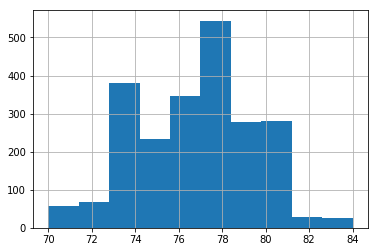

In [34]:
df_trans['score'].hist()
plt.show()

In [35]:
score_class = {70:1,71:2,72:3,73:4,74:5,75:6,76:7,77:8,78:9,
               79:10,80:11,81:12,82:13,83:14,84:15}

In [37]:
df_trans = df_trans.dropna()

In [38]:
df_trans['score_class'] = df_trans['score'].apply(lambda x: score_class[x])

In [42]:
df_trans = pd.read_csv('../DataPaper/data/ann_transcript_score_class.csv')

In [56]:
df_cons = df_trans[df_trans['label'].str.contains('constructive')].reset_index()
df_cons = df_cons.drop(['Unnamed: 0','index'],axis = 1)

In [64]:
df_cons.groupby(['score_class']).count()

,text,label,username,round,score
score_class,,,,,
1,2,2,2,2,2
2,19,19,19,19,19
3,15,15,15,15,15
4,59,59,59,59,59
5,62,62,62,62,62
6,71,71,71,71,71
7,151,151,151,151,151
8,135,135,135,135,135
9,66,66,66,66,66


In [58]:
dftest_list =[]
dftrain_list = []
for score in df_cons['score_class'].unique():
    test = df_cons[df_cons['score_class']==score].sample(frac = 1/5)
    train = df_cons[df_cons['score_class']==score].drop(test.index)
    dftest_list.append(test)
    dftrain_list.append(train)

In [59]:
dftest_cons = pd.concat(dftest_list)
dftrain_cons = pd.concat(dftrain_list)

In [62]:
dftest_cons['score_class'].unique()

array([ 9,  7, 10, 11,  4,  8, 13,  6, 15,  5,  3, 12,  2])

In [65]:
dftrain_cons['score_class'].unique()

array([ 9,  7, 10, 11,  4,  8, 13,  6, 15,  5,  3, 12,  2,  1, 14])

In [66]:
dftest_cons.shape

(158, 6)

In [79]:
dftest_cons =dftest_cons.reset_index()

In [68]:
dftrain_cons.shape

(643, 6)

In [80]:
for i in dftest_cons.index:
    text = dftest_cons['text'].iloc[i].split(' ')
    if len(text)>512:
        print(i)

70
86


In [82]:
dftest_cons = dftest_cons.drop([70,86])

In [104]:
dftest_cons = pd.read_csv('data/ann_transcript_score_class_test.csv')
dftrain_cons = pd.read_csv('data/ann_transcript_score_class_train.csv')

In [86]:
dftest_cons['score_class']=dftest_cons['score_class']-1
dftrain_cons['score_class']=dftrain_cons['score_class']-1

In [87]:
dftest_cons.to_csv('data/ann_transcript_score_class_test.csv')
dftrain_cons.to_csv('data/ann_transcript_score_class_train.csv')

In [105]:
dftrain_cons['score_class'].unique()

array([ 8,  6,  9, 10,  3,  7, 12,  5, 14,  4,  2, 11,  1,  0, 13])

In [98]:
def squash(x):
    if x>=0 and x<=2:
        return 0
    elif x==3 or x==4:
        return 1
    elif x==5 or x == 6:
        return 2
    elif x == 7 or x==8:
        return 3
    elif x == 9 or x ==10:
        return 4
    elif x ==  11 or x ==12:
        return 5
    else:
        return 6

In [106]:
dftrain_red = dftrain_cons
dftest_red = dftest_cons

In [107]:
dftrain_red['score_class'] = dftrain_red['score_class'].apply(lambda x: squash(x))
dftest_red['score_class'] = dftest_red['score_class'].apply(lambda x: squash(x))

In [111]:
dftest_red['score_class'].unique()

array([3, 2, 4, 1, 5, 6, 0])

In [198]:
def trunc(df):
    for i in df.index:
        text = df['text'].iloc[i].split(' ')
        if len(text)>385:
            sent = text[-385:]
            sent = ' '.join(sent)
            df['text'].iloc[i] = sent
            print(i)
    
    return df

In [140]:
df = pd.concat([dftrain_red,dftest_red])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [142]:
df['id'] = df['username'] +'_'+df['round']

In [147]:
df_helper=df.groupby('id')['score_class'].first().reset_index()
df_helper.groupby('score_class').count()

,id
score_class,
0,10
1,33
2,49
3,43
4,39
5,5
6,3


In [156]:
train_ids=[]
test_ids=[]
for score in df_helper['score_class'].unique():
    test = df_helper[df_helper['score_class']==score].sample(frac = 1/5)
    train = df_helper[df_helper['score_class']==score].drop(test.index)
    train_ids= train_ids+list(train['id'].unique())
    test_ids=test_ids+list(test['id'].unique())

In [159]:
len(train_ids)+len(test_ids)

182

In [212]:
def make_df(df,id_list):
    df_list=[]
    for ids in id_list:
        df_list.append(df[df['id']==ids])
    return pd.concat(df_list)

In [164]:
dftrain_red = make_df(df,train_ids)
dftest_red = make_df(df,test_ids)

In [168]:
dftest_red['score_class'].unique()

array([1, 4, 5, 2, 0, 3, 6])

In [180]:
dftest_red=dftest_red.reset_index()
dftrain_red=dftrain_red.reset_index()

In [194]:
dftest_red = pd.read_csv('data/ann_transcript_score_class_test.csv')
dftrain_red = pd.read_csv('data/ann_transcript_score_class_train.csv')

In [199]:
dftest_red = trunc(dftest_red)
dftrain_red = trunc(dftrain_red)

105
109
112
3
5
26
60
75
89
99
100
200
209
228
231
264
357
372
382
441
464
466
475
518
569
576
578
595
596


In [200]:
dftest_red.to_csv('data/ann_transcript_score_class_test.csv')
dftrain_red.to_csv('data/ann_transcript_score_class_train.csv')

In [181]:
def make_dict(df):
    dict_list = []
    for i in df.index:
        text = df['text'].iloc[i]
        score = df['score_class'].iloc[i]
        un_id = df['id'].iloc[i]
        dict_list.append({text:[score,un_id]})
    return dict_list

In [184]:
test_list = make_dict(dftest_red)
train_list = make_dict(dftrain_red)

In [185]:
test_list

[{"Now going on to some of our points, it does exacerbate the divide. Having not having these taxes does exacerbate the divide between the rich and poor, because of the lack of property available for the middle class in suburbs. What they'll continue to do is continue to stay in these cities, they'll continue to pay these high rents, and they will stop other people who are in the cities from paying those rents.": [1,
   'akumthekar_round1']},
 {'what we are talking about, the last point that will be expanded upon in the model is about having a more diverse city. We have less marginalization.': [1,
   'akumthekar_round1']},
 {"In the case of America for example, there's often heavy support for different aspects of gun control, but none of those have passed whatsoever because of there's no real political will on the side of the legislature. If you want to talk about the fact that we're punishing the majority for the actions of the very few you can even see in some States in America like 

In [187]:
with open('data/debate_cons_test.pkl', 'wb') as f:
    pickle.dump(test_list, f)

In [188]:
with open('data/debate_cons_train.pkl', 'wb') as f:
    pickle.dump(train_list, f)

In [201]:
dftest_red.groupby('score_class').count()

,Unnamed: 0,index,label,round,score,text,username,id
score_class,,,,,,,,
0,8,8,8,8,8,8,8,8
1,21,21,21,21,21,21,21,21
2,40,40,40,40,40,40,40,40
3,59,59,59,59,59,59,59,59
4,38,38,38,38,38,38,38,38
5,10,10,10,10,10,10,10,10
6,4,4,4,4,4,4,4,4


### Making Validation Set

In [218]:
df_val_helper=dftrain_red.groupby('id')['score_class'].first().reset_index()

In [250]:
dev_train_ids=[]
val_ids=[]
for score in df_val_helper['score_class'].unique():
    val = df_val_helper[df_val_helper['score_class']==score].sample(frac = 0.15)
    train = df_val_helper[df_val_helper['score_class']==score].drop(val.index)
    dev_train_ids= dev_train_ids+list(train['id'].unique())
    val_ids=val_ids+list(val['id'].unique())

In [251]:
dftrain_dev = make_df(dftrain_red,dev_train_ids)
dfval = make_df(dftrain_red,val_ids)

In [252]:
dftrain_dev.shape

(532, 9)

In [253]:
dfval.shape

(87, 9)

In [254]:
dftrain_red.shape

(619, 9)

In [255]:
dfval['score_class'].unique()

array([1, 4, 5, 0, 3, 2])

In [256]:
dfval.to_csv('data/ann_transcript_score_class_val.csv')
dftrain_dev.to_csv('data/ann_transcript_score_class_train.csv')